# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


## Load and merge the datasets

In [5]:
df_2024 = pd.read_csv('../Data/monthly_hourly_load_values_2024.csv', delimiter = ',')
df_2023 = pd.read_excel('../Data/monthly_hourly_load_values_2023.xlsx')
df_2022 = pd.read_csv('../Data/monthly_hourly_load_values_2022.csv', sep = ';')
df_2021 = pd.read_csv('../Data/monthly_hourly_load_values_2021.csv', sep = ';')
df_2020 = pd.read_excel('../Data/monthly_hourly_load_values_2020.xlsx')
df_2019 = pd.read_excel('../Data/monthly_hourly_load_values_2019.xlsx')

c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
df = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024],ignore_index= True)
df.head()

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,CreateDate,UpdateDate
0,Monthly Hourly Load Values,2019-01-01 00:00:00,2019-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 01:00:00,AT,100,5852.5,5852.5,2024-05-29 11:37:27.260000,2024-05-29 11:37:27.260000
1,Monthly Hourly Load Values,2019-01-01 01:00:00,2019-01-01 00:00:00,1970-01-01 01:00:00,1970-01-01 02:00:00,AT,100,5619.2,5619.2,2024-05-29 11:37:27.260000,2024-05-29 11:37:27.260000
2,Monthly Hourly Load Values,2019-01-01 02:00:00,2019-01-01 00:00:00,1970-01-01 02:00:00,1970-01-01 03:00:00,AT,100,5323.9,5323.9,2024-05-29 11:37:27.260000,2024-05-29 11:37:27.260000
3,Monthly Hourly Load Values,2019-01-01 03:00:00,2019-01-01 00:00:00,1970-01-01 03:00:00,1970-01-01 04:00:00,AT,100,5273.3,5273.3,2024-05-29 11:37:27.260000,2024-05-29 11:37:27.260000
4,Monthly Hourly Load Values,2019-01-01 04:00:00,2019-01-01 00:00:00,1970-01-01 04:00:00,1970-01-01 05:00:00,AT,100,5439.0,5439.0,2024-05-29 11:37:27.260000,2024-05-29 11:37:27.260000


## Country Codes:

| Country Code | Country Name           | Country Code | Country Name           |
|--------------|------------------------|--------------|------------------------|
| AL           | Albania                | AT           | Austria                |
| BA           | Bosnia and Herzegovina | BE           | Belgium                |
| BG           | Bulgaria               | CH           | Switzerland            |
| CZ           | Czech Republic         | DE           | Germany                |
| DK           | Denmark                | EE           | Estonia                |
| ES           | Spain                  | FI           | Finland                |
| FR           | France                 | GB           | United Kingdom         |
| GE           | Georgia                | GR           | Greece                 |
| HR           | Croatia                | HU           | Hungary                |
| IE           | Ireland                | IT           | Italy                  |
| LT           | Lithuania             | LU           | Luxembourg             |
| LV           | Latvia                 | MD           | Moldova                |
| ME           | Montenegro             | MK           | North Macedonia        |
| NL           | Netherlands            | NO           | Norway                 |
| PL           | Poland                 | PT           | Portugal               |
| RO           | Romania                | RS           | Serbia                 |
| SE           | Sweden                 | SI           | Slovenia               |
| SK           | Slovakia               | XK           | Kosovo                 |


## Data dimensions and description:

In [54]:
# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 1675433
Number of features: 11
Example data:
                  MeasureItem              DateUTC            DateShort  \
0  Monthly Hourly Load Values  2019-01-01 00:00:00  2019-01-01 00:00:00   
1  Monthly Hourly Load Values  2019-01-01 01:00:00  2019-01-01 00:00:00   
2  Monthly Hourly Load Values  2019-01-01 02:00:00  2019-01-01 00:00:00   
3  Monthly Hourly Load Values  2019-01-01 03:00:00  2019-01-01 00:00:00   
4  Monthly Hourly Load Values  2019-01-01 04:00:00  2019-01-01 00:00:00   

              TimeFrom               TimeTo CountryCode  Cov_ratio   Value  \
0  1970-01-01 00:00:00  1970-01-01 01:00:00          AT        100  5852.5   
1  1970-01-01 01:00:00  1970-01-01 02:00:00          AT        100  5619.2   
2  1970-01-01 02:00:00  1970-01-01 03:00:00          AT        100  5323.9   
3  1970-01-01 03:00:00  1970-01-01 04:00:00          AT        100  5273.3   
4  1970-01-01 04:00:00  1970-01-01 05:00:00          AT        100  5439.0   

   Value_ScaleTo

## Removing useless columns:

In [55]:
df_s = df[['DateUTC', 'CountryCode', 'Value']]

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [22]:
# Check for missing values
missing_values = df_s.isnull().sum()
missing_values


DateUTC        0
CountryCode    0
Value          0
dtype: int64

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


# convert the time and creaty a new daily dataframe:

In [ ]:
df_s['DateUTC'] = pd.to_datetime(df_s['DateUTC'])

df_daily = df_s.groupby([df_s['DateUTC'].dt.date, 'CountryCode'])['Value'].mean().reset_index()

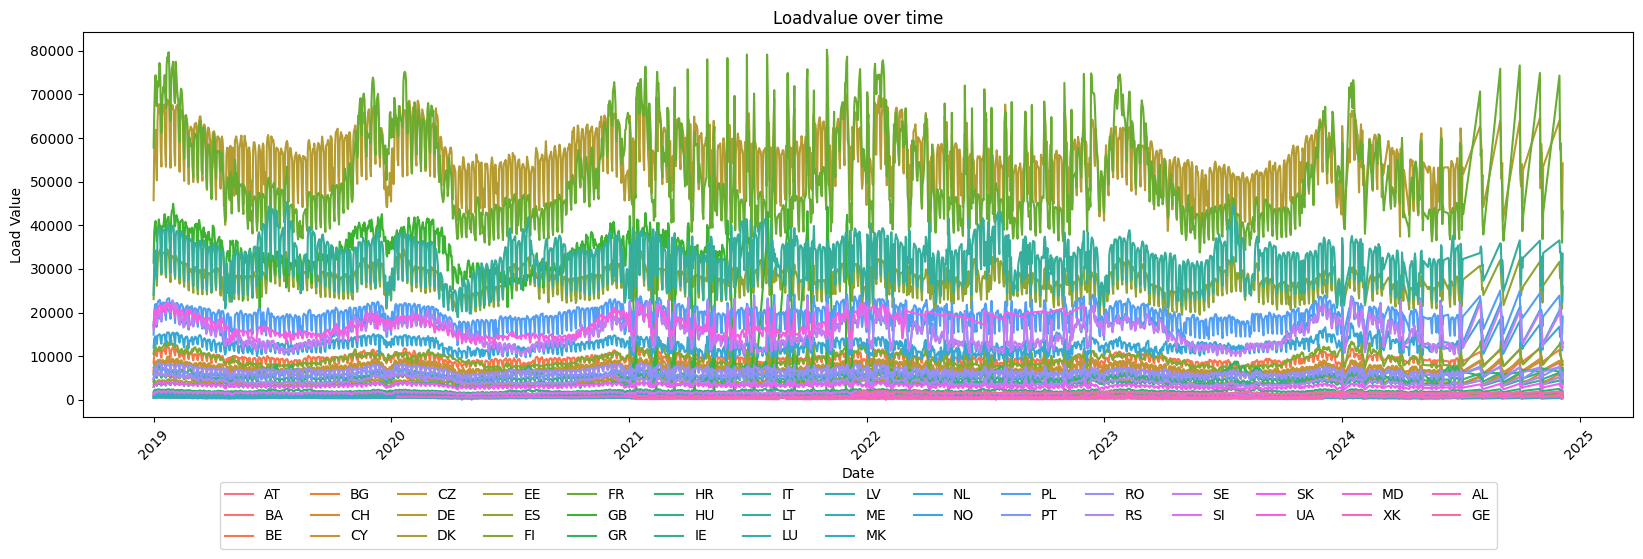

In [48]:
def plot(df):
    plt.figure(figsize=(20,5))
    sns.lineplot(x='DateUTC', y='Value', hue='CountryCode', data= df)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=15)

    plt.xlabel('Date')
    plt.ylabel('Load Value')
    plt.title('Loadvalue over time')
    plt.xticks(rotation=45)


    plt.show()
plot(df_daily)

## It's too many countries to properly visualize. Let's just look at Germany:

In [56]:
df_daily_de = df_daily[df_daily['CountryCode'] == 'DE']
df_de = df[df['CountryCode'] == 'DE']


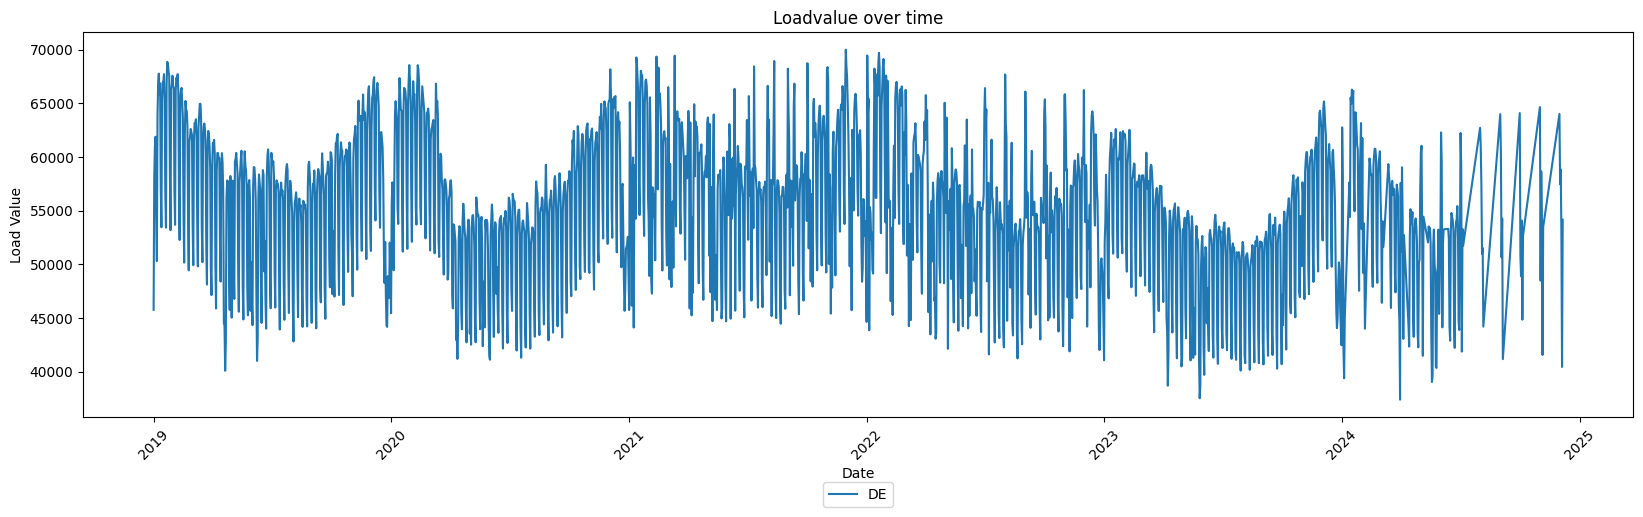

In [53]:
plot(df_daily_de)

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
